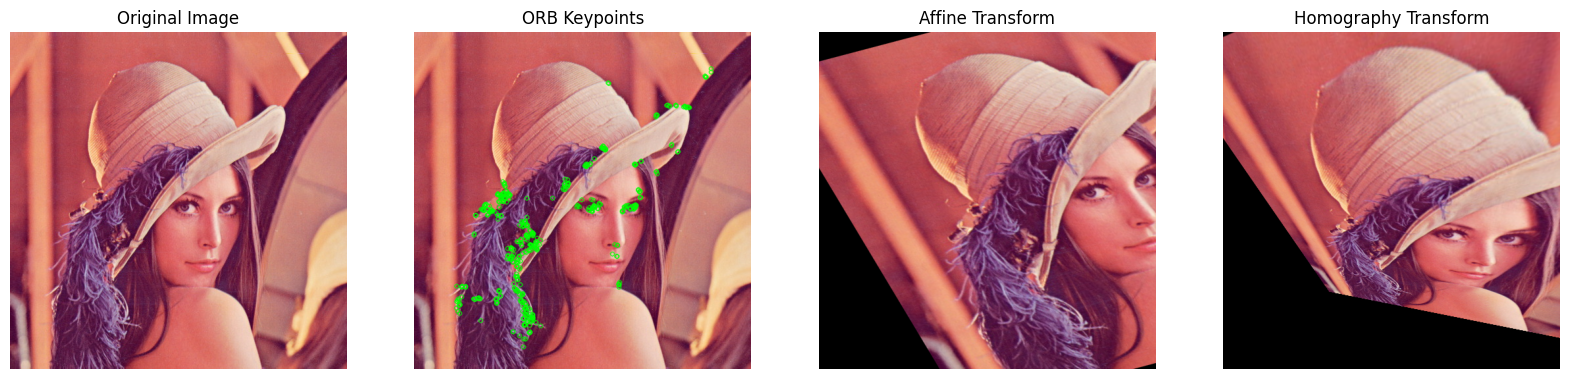

In [8]:
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt

# URL of the new image
image_url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"

# Download the image
urllib.request.urlretrieve(image_url, "sample_image.jpg")
# Read the image
image = cv2.imread("sample_image.jpg", cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Feature detection using ORB
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(image, None)
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)

# Affine transformation
rows, cols, ch = image.shape
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M_affine = cv2.getAffineTransform(pts1, pts2)
affine_transformed_image = cv2.warpAffine(image, M_affine, (cols, rows))

# Homography transformation
pts1 = np.float32([[50, 50], [200, 50], [50, 200], [200, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250], [250, 250]])
M_homography, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC, 5.0)
homography_transformed_image = cv2.warpPerspective(image, M_homography, (cols, rows))

# Display the images
plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("ORB Keypoints")
plt.imshow(image_with_keypoints)
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Affine Transform")
plt.imshow(affine_transformed_image)
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Homography Transform")
plt.imshow(homography_transformed_image)
plt.axis('off')

plt.show()


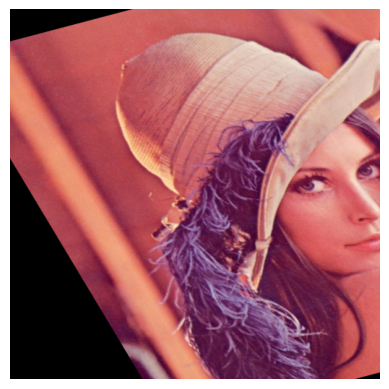

In [11]:

# Affine transformation
rows, cols, ch = image.shape
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M_affine = cv2.getAffineTransform(pts1, pts2)
affine_transformed_image = cv2.warpAffine(image, M_affine, (cols, rows))

plt.imshow(affine_transformed_image)
plt.axis('off')
plt.show()


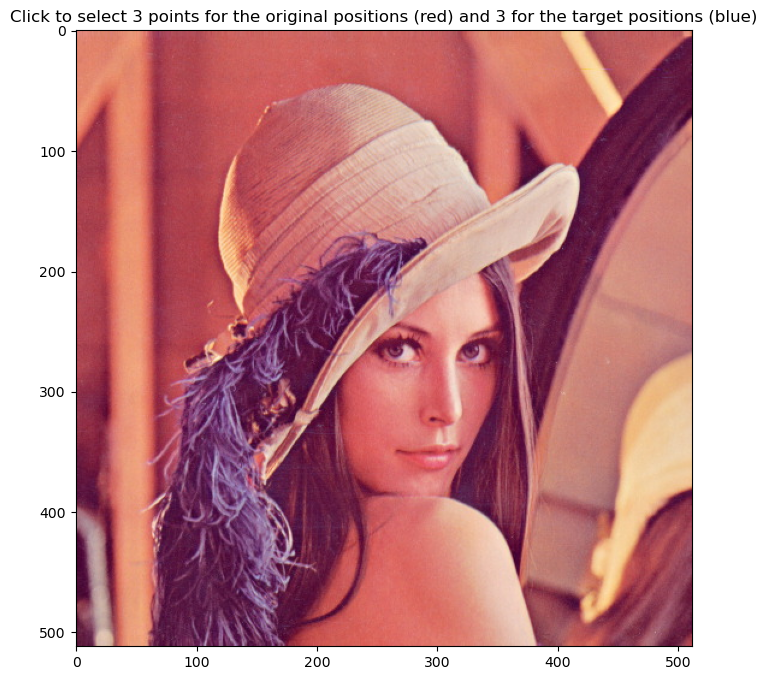

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display
import urllib.request
import tkinter as tk
from tkinter import simpledialog

# URL of the new image
image_url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"

# Download the image
urllib.request.urlretrieve(image_url, "sample_image.jpg")

# Read the image
image = cv2.imread("sample_image.jpg", cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Global variables to store points
pts1 = []
pts2 = []

# Function to plot image and select points
def select_points(event):
    global pts1, pts2
    if event.inaxes:
        if len(pts1) < 3:
            pts1.append((event.xdata, event.ydata))
            ax.plot(event.xdata, event.ydata, 'ro')
        elif len(pts2) < 3:
            pts2.append((event.xdata, event.ydata))
            ax.plot(event.xdata, event.ydata, 'bo')
        fig.canvas.draw()
        if len(pts1) == 3 and len(pts2) == 3:
            fig.canvas.mpl_disconnect(cid)
            plt.close(fig)
            create_interactive_affine_transform()

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image)
plt.title("Click to select 3 points for the original positions (red) and 3 for the target positions (blue)")
cid = fig.canvas.mpl_connect('button_press_event', select_points)
plt.show()

# Function to perform affine transform
def affine_transform(p1x0, p1y0, p1x1, p1y1, p1x2, p1y2, p2x0, p2y0, p2x1, p2y1, p2x2, p2y2):
    pts1 = np.float32([[p1x0, p1y0], [p1x1, p1y1], [p1x2, p1y2]])
    pts2 = np.float32([[p2x0, p2y0], [p2x1, p2y1], [p2x2, p2y2]])
    rows, cols, ch = image.shape
    M_affine = cv2.getAffineTransform(pts1, pts2)
    affine_transformed_image = cv2.warpAffine(image, M_affine, (cols, rows))

    plt.figure(figsize=(10, 5))
    plt.imshow(affine_transformed_image)
    plt.axis('off')
    plt.show()

# Function to create interactive sliders for affine transform
def create_interactive_affine_transform():
    root = tk.Tk()
    root.withdraw()  # Hide the root window

    p1x0, p1y0 = pts1[0]
    p1x1, p1y1 = pts1[1]
    p1x2, p1y2 = pts1[2]
    p2x0, p2y0 = pts2[0]
    p2x1, p2y1 = pts2[1]
    p2x2, p2y2 = pts2[2]
    
    interactive_plot = interactive(
        affine_transform,
        p1x0=widgets.FloatSlider(min=0, max=image.shape[1], step=1, value=p1x0),
        p1y0=widgets.FloatSlider(min=0, max=image.shape[0], step=1, value=p1y0),
        p1x1=widgets.FloatSlider(min=0, max=image.shape[1], step=1, value=p1x1),
        p1y1=widgets.FloatSlider(min=0, max=image.shape[0], step=1, value=p1y1),
        p1x2=widgets.FloatSlider(min=0, max=image.shape[1], step=1, value=p1x2),
        p1y2=widgets.FloatSlider(min=0, max=image.shape[0], step=1, value=p1y2),
        p2x0=widgets.FloatSlider(min=0, max=image.shape[1], step=1, value=p2x0),
        p2y0=widgets.FloatSlider(min=0, max=image.shape[0], step=1, value=p2y0),
        p2x1=widgets.FloatSlider(min=0, max=image.shape[1], step=1, value=p2x1),
        p2y1=widgets.FloatSlider(min=0, max=image.shape[0], step=1, value=p2y1),
        p2x2=widgets.FloatSlider(min=0, max=image.shape[1], step=1, value=p2x2),
        p2y2=widgets.FloatSlider(min=0, max=image.shape[0], step=1, value=p2y2)
    )
    
    display(interactive_plot)
    root.mainloop()


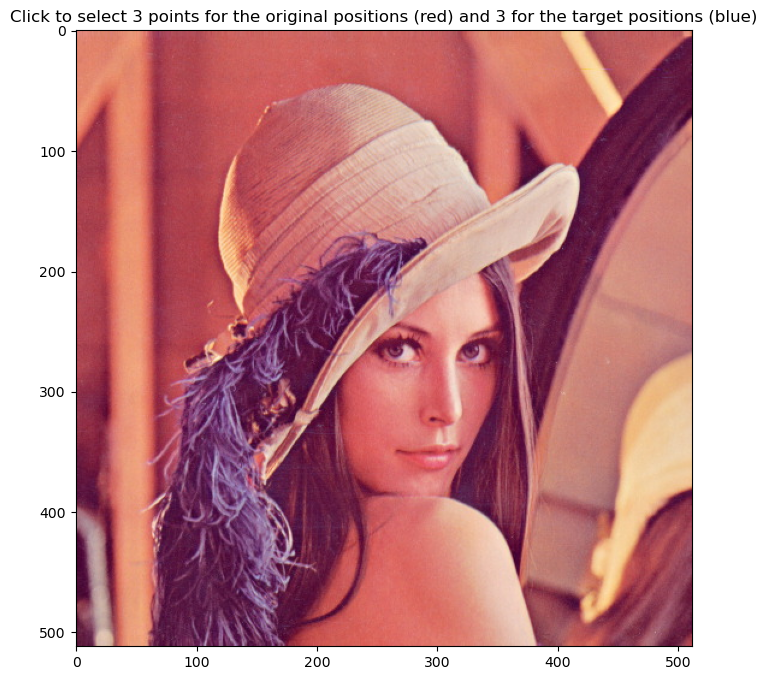

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display
import urllib.request
import tkinter as tk
from tkinter import simpledialog

# URL of the new image
image_url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"

# Download the image
urllib.request.urlretrieve(image_url, "sample_image.jpg")

# Read the image
image = cv2.imread("sample_image.jpg", cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Global variables to store points
pts1 = []
pts2 = []

# Function to plot image and select points
def select_points(event):
    global pts1, pts2
    print("TEST")
    if event.inaxes:
        if len(pts1) < 3:
            pts1.append((event.xdata, event.ydata))
            ax.plot(event.xdata, event.ydata, 'ro')
        elif len(pts2) < 3:
            pts2.append((event.xdata, event.ydata))
            ax.plot(event.xdata, event.ydata, 'bo')
        fig.canvas.draw()
        if len(pts1) == 3 and len(pts2) == 3:
            fig.canvas.mpl_disconnect(cid)
            plt.close(fig)
            create_interactive_affine_transform()

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image)
plt.title("Click to select 3 points for the original positions (red) and 3 for the target positions (blue)")
cid = fig.canvas.mpl_connect('button_press_event', select_points)
plt.show()

# Function to perform affine transform
def affine_transform(p1x0, p1y0, p1x1, p1y1, p1x2, p1y2, p2x0, p2y0, p2x1, p2y1, p2x2, p2y2):
    pts1 = np.float32([[p1x0, p1y0], [p1x1, p1y1], [p1x2, p1y2]])
    pts2 = np.float32([[p2x0, p2y0], [p2x1, p2y1], [p2x2, p2y2]])
    rows, cols, ch = image.shape
    M_affine = cv2.getAffineTransform(pts1, pts2)
    affine_transformed_image = cv2.warpAffine(image, M_affine, (cols, rows))

    plt.figure(figsize=(10, 5))
    plt.imshow(affine_transformed_image)
    plt.axis('off')
    plt.show()

# Function to create interactive sliders for affine transform
def create_interactive_affine_transform():
    root = tk.Tk()
    root.withdraw()  # Hide the root window

    p1x0, p1y0 = pts1[0]
    p1x1, p1y1 = pts1[1]
    p1x2, p1y2 = pts1[2]
    p2x0, p2y0 = pts2[0]
    p2x1, p2y1 = pts2[1]
    p2x2, p2y2 = pts2[2]
    
    interactive_plot = interactive(
        affine_transform,
        p1x0=widgets.FloatSlider(min=0, max=image.shape[1], step=1, value=p1x0),
        p1y0=widgets.FloatSlider(min=0, max=image.shape[0], step=1, value=p1y0),
        p1x1=widgets.FloatSlider(min=0, max=image.shape[1], step=1, value=p1x1),
        p1y1=widgets.FloatSlider(min=0, max=image.shape[0], step=1, value=p1y1),
        p1x2=widgets.FloatSlider(min=0, max=image.shape[1], step=1, value=p1x2),
        p1y2=widgets.FloatSlider(min=0, max=image.shape[0], step=1, value=p1y2),
        p2x0=widgets.FloatSlider(min=0, max=image.shape[1], step=1, value=p2x0),
        p2y0=widgets.FloatSlider(min=0, max=image.shape[0], step=1, value=p2y0),
        p2x1=widgets.FloatSlider(min=0, max=image.shape[1], step=1, value=p2x1),
        p2y1=widgets.FloatSlider(min=0, max=image.shape[0], step=1, value=p2y1),
        p2x2=widgets.FloatSlider(min=0, max=image.shape[1], step=1, value=p2x2),
        p2y2=widgets.FloatSlider(min=0, max=image.shape[0], step=1, value=p2y2)
    )
    
    display(interactive_plot)
    root.mainloop()
